In [113]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import pandas as pd
import os
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

%run data_preproc.ipynb
%matplotlib inline

(2, 24, 1) (2, 1)


### Prepare data

In [95]:
input_dir = './data'
input_files = [f for f in os.listdir(input_dir) if '.xlsx' in f]
input_files

['201711010800.xlsx',
 '201801010800.xlsx',
 '201802010800.xlsx',
 '201712010800.xlsx']

In [104]:
data = PreProc(input_dir, '蒸気')
data.input_dir
data.set_train_test_files('201801010800.xlsx', '201802010800.xlsx')
df=data.get_df(data.train_file)

y_train = data.strip(data.get_target(data.train_file, '需要蒸気'))
y_test = data.strip(data.get_target(data.test_file, '需要蒸気'))

### Network design

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           (None, 138, 32)           256       
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 27, 32)            0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 21, 32)            7200      
_________________________________________________________________
global_max_pooling1d_28 (Glo (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 7,489
Trainable params: 7,489
Non-trainable params: 0
_________________________________________________________________


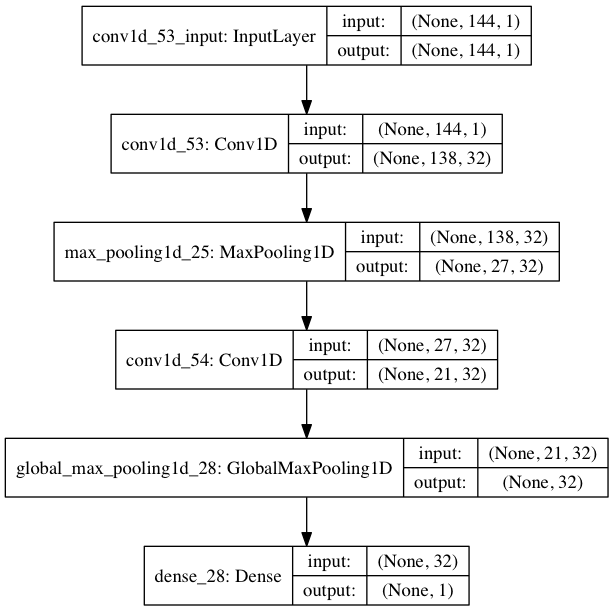

In [101]:
'''
Be careful of the flow of tensor shapes
    https://stackoverflow.com/questions/42392798/error-during-playing-with-keras-example-pretrained-word-embeddings
'''
len_x = 144 # feature length, using 144 hours (one week) time series as features to predict the next y
batch_size = 32

model=Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(len_x, 1)))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

plot_model(model, show_shapes=True, to_file='simple_1d_conv.png')

from IPython.display import Image
Image("simple_1d_conv.png")

### Training

In [103]:
steps = (len(y_train) - len_x) // batch_size

model.compile(optimizer=RMSprop(lr=1e-4), loss='mae', metrics=['acc'])
history = model.fit_generator(generator=data.generator_1d(y_train, len_x, batch_size),
                              steps_per_epoch=steps, shuffle=False, verbose=1,
                              epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 61ms/step - loss: 10.9815 - acc: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 9.3411 - acc: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 0s 10ms/step - loss: 6.2269 - acc: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 2.1041 - acc: 0.0000e+00
Epoch 5/200
18/18 [==============================] - 0s 11ms/step - loss: 1.4590 - acc: 0.0000e+00
Epoch 6/200
18/18 [==============================] - 0s 11ms/step - loss: 1.5180 - acc: 0.0000e+00
Epoch 7/200
18/18 [==============================] - 0s 12ms/step - loss: 1.7527 - acc: 0.0000e+00
Epoch 8/200
18/18 [==============================] - 0s 12ms/step - loss: 1.6812 - acc: 0.0000e+00
Epoch 9/200
18/18 [==============================] - 0s 11ms/step - loss: 1.6830 - acc: 0.0000e+00
Epoch 10/200
18/18 [==============================] - 0s 11ms/step - loss: 2.0252 - acc: 0.0000e+00
Epoch 11/2

18/18 [==============================] - 0s 12ms/step - loss: 1.3763 - acc: 0.0000e+00
Epoch 84/200
18/18 [==============================] - 0s 12ms/step - loss: 1.3724 - acc: 0.0000e+00
Epoch 85/200
18/18 [==============================] - 0s 13ms/step - loss: 2.0970 - acc: 0.0000e+00
Epoch 86/200
18/18 [==============================] - 0s 13ms/step - loss: 1.7820 - acc: 0.0000e+00
Epoch 87/200
18/18 [==============================] - 0s 11ms/step - loss: 1.4365 - acc: 0.0000e+00
Epoch 88/200
18/18 [==============================] - 0s 13ms/step - loss: 1.8271 - acc: 0.0000e+00
Epoch 89/200
18/18 [==============================] - 0s 13ms/step - loss: 3.2727 - acc: 0.0000e+00
Epoch 90/200
18/18 [==============================] - 0s 14ms/step - loss: 9.3681 - acc: 0.0000e+00
Epoch 91/200
18/18 [==============================] - 0s 12ms/step - loss: 6.5702 - acc: 0.0000e+00
Epoch 92/200
18/18 [==============================] - 0s 12ms/step - loss: 0.6225 - acc: 0.0087
Epoch 93/200
18/1

18/18 [==============================] - 0s 12ms/step - loss: 1.3806 - acc: 0.0000e+00
Epoch 164/200
18/18 [==============================] - 0s 14ms/step - loss: 1.4589 - acc: 0.0000e+00
Epoch 165/200
18/18 [==============================] - 0s 13ms/step - loss: 1.6421 - acc: 0.0000e+00
Epoch 166/200
18/18 [==============================] - 0s 11ms/step - loss: 1.3137 - acc: 0.0000e+00
Epoch 167/200
18/18 [==============================] - 0s 14ms/step - loss: 1.4155 - acc: 0.0000e+00
Epoch 168/200
18/18 [==============================] - 0s 13ms/step - loss: 1.8986 - acc: 0.0000e+00
Epoch 169/200
18/18 [==============================] - 0s 15ms/step - loss: 2.2590 - acc: 0.0000e+00
Epoch 170/200
18/18 [==============================] - 0s 15ms/step - loss: 2.3901 - acc: 0.0000e+00
Epoch 171/200
18/18 [==============================] - 0s 13ms/step - loss: 1.3900 - acc: 0.0000e+00
Epoch 172/200
18/18 [==============================] - 0s 13ms/step - loss: 1.2657 - acc: 0.0000e+00
Epoc

### Predicting

In [107]:
steps = (len(y_test) - len_x) // batch_size

preds = model.predict_generator(generator=data.generator_1d(y_test, len_x, batch_size), steps=steps)

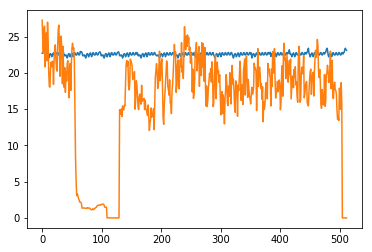

In [115]:
plt.plot(preds)
plt.plot(y_test[-512:])